In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
path= r'C:\Users\Anjelito\Documents\personal project\regression - student grade\data\intermediate\student-mat-cleaned.parquet'
df= pd.read_parquet(path)

Attribute Information:
1. **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. **sex** - student's sex (binary: 'F' - female or 'M' - male)
3. **age** - student's age (numeric: from 15 to 22)
4. **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
5. **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â “ secondary education or 4 â€“ higher education)
8. **Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â “ secondary education or 4 â€“ higher education)
9. **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
13. **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
16. **schoolsup** - extra educational support (binary: yes or no)
17. **famsup** - family educational support (binary: yes or no)
18. **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. **activities** - extra-curricular activities (binary: yes or no)
20. **nursery** - attended nursery school (binary: yes or no)
21. **higher** - wants to take higher education (binary: yes or no)
22. **internet** - Internet access at home (binary: yes or no)
23. **romantic** - with a romantic relationship (binary: yes or no)
24. **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
26. **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
27. **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. **health** - current health status (numeric: from 1 - very bad to 5 - very good)
30. **absences** - number of school absences (numeric: from 0 to 93)

In [179]:
df.sample(5)

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,...,internet,romantic,famrel,freetime,goout,dalc,walc,health,absences,score
6,GP,M,16,U,LE3,T,5_9_grade,5_9_grade,other,other,...,True,False,4,4,4,1,1,3,0,12
240,GP,M,17,U,LE3,T,higher,secondary,health,other,...,True,True,2,5,5,1,4,5,14,12
61,GP,F,16,U,GT3,T,primary,primary,services,services,...,True,True,5,5,5,5,5,5,6,10
274,GP,F,17,U,GT3,T,5_9_grade,higher,at_home,health,...,True,True,4,3,3,1,1,1,2,10
268,GP,M,18,U,GT3,T,higher,5_9_grade,health,other,...,True,True,5,4,5,1,3,5,10,10


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      395 non-null    category
 1   sex         395 non-null    category
 2   age         395 non-null    uint8   
 3   address     395 non-null    category
 4   famsize     395 non-null    category
 5   pstatus     395 non-null    category
 6   medu        395 non-null    category
 7   fedu        395 non-null    category
 8   mjob        395 non-null    category
 9   fjob        395 non-null    category
 10  reason      395 non-null    category
 11  guardian    395 non-null    category
 12  traveltime  395 non-null    category
 13  studytime   395 non-null    category
 14  failures    395 non-null    uint8   
 15  schoolsup   395 non-null    bool    
 16  famsup      395 non-null    bool    
 17  paid        395 non-null    bool    
 18  activities  395 non-null    bool    
 19  nursery 

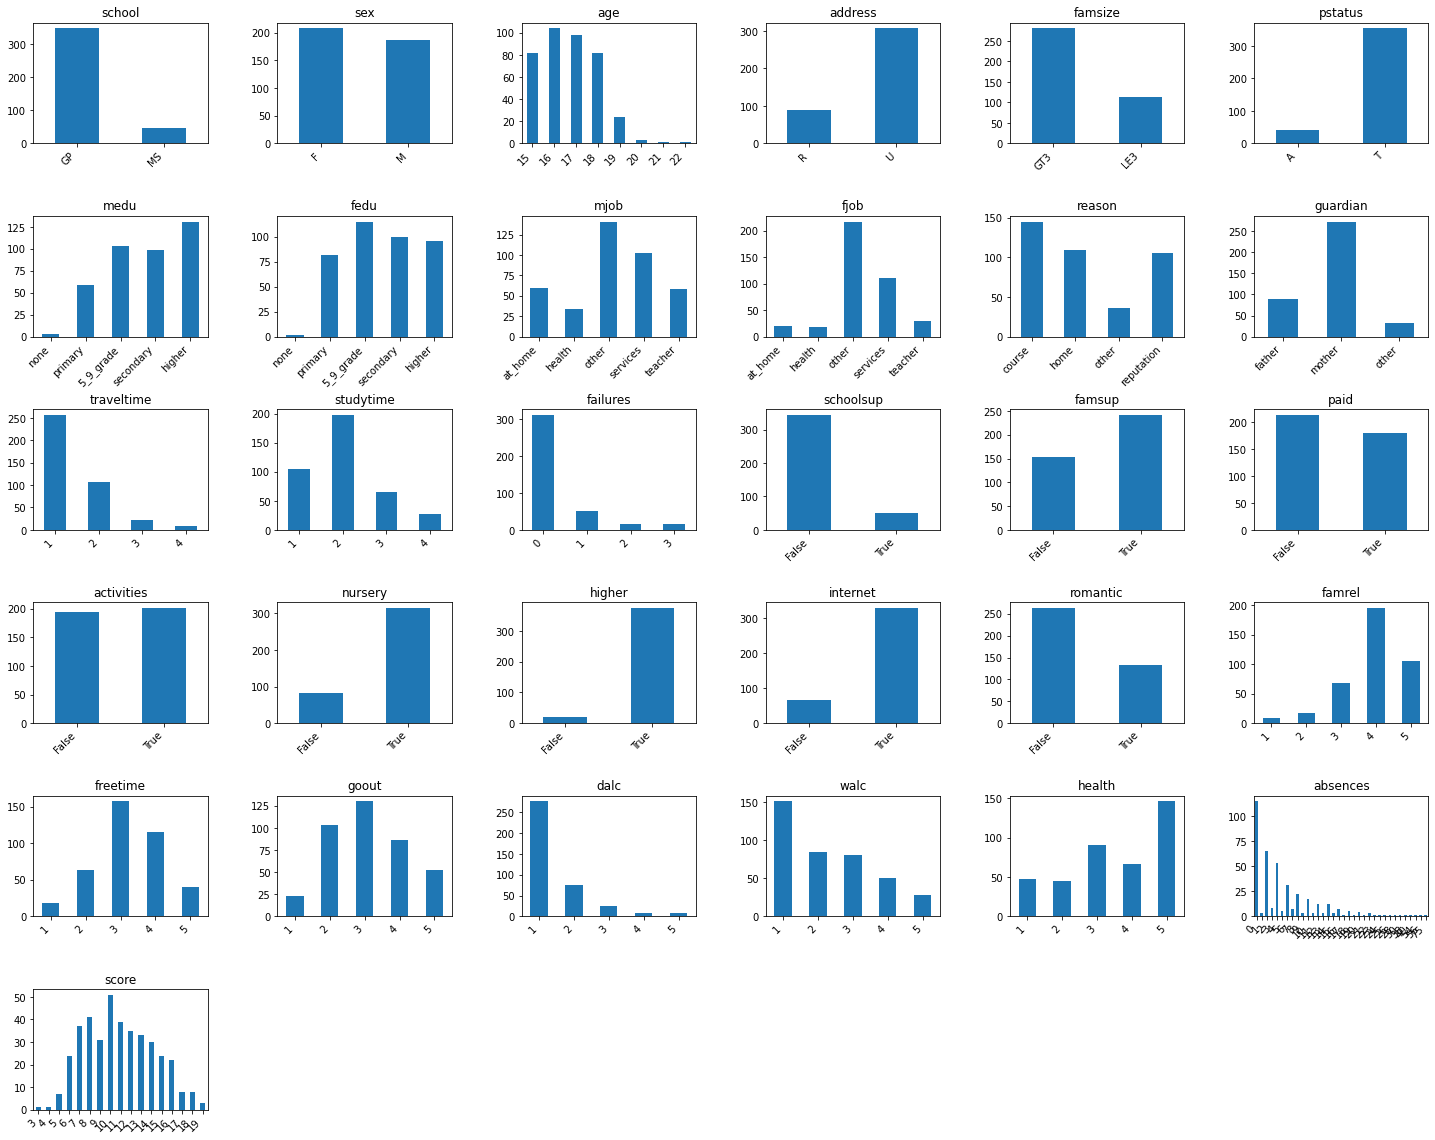

In [181]:
fig, axs = plt.subplots(nrows= 6, ncols= 6, figsize=(25, 20))
columns= df.columns.to_list()
plt.subplots_adjust(wspace= 0.4, hspace= 0.6)

for col, ax in zip(columns, axs.ravel()):
    data= df[col].value_counts().sort_index()
    data.plot(ax= ax, kind= 'bar')
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for i in range(-5, 0, 1):
    axs.flat[i].set_visible(False)
    
plt.show()

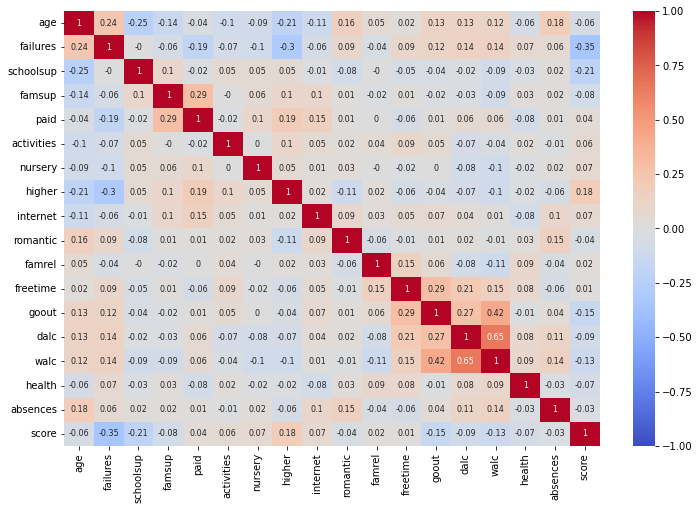

In [182]:
corr= (df
    .corr()
    .round(2)
)
fig, ax= plt.subplots(figsize= (12, 8))
ax= sns.heatmap(
    corr, 
    cmap= 'coolwarm', 
    annot= True, 
    annot_kws= {'fontsize': 8},
    vmin= -1, 
    vmax= 1
)
plt.show()

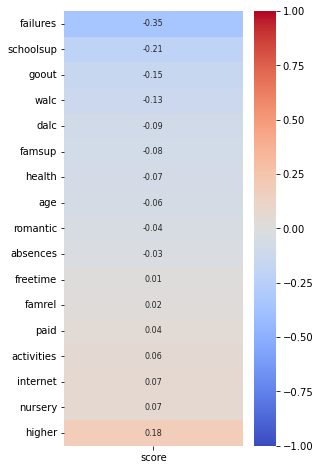

In [183]:
corr= (df
    .corr()['score']
    .round(2)
    .to_frame()
    .sort_values('score')
    .drop(index= 'score')
)
fig, ax= plt.subplots(figsize= (4, 8))
ax= sns.heatmap(
    corr, 
    cmap= 'coolwarm', 
    annot= True, 
    annot_kws= {'fontsize': 8},
    vmin= -1, 
    vmax= 1
)

plt.show()

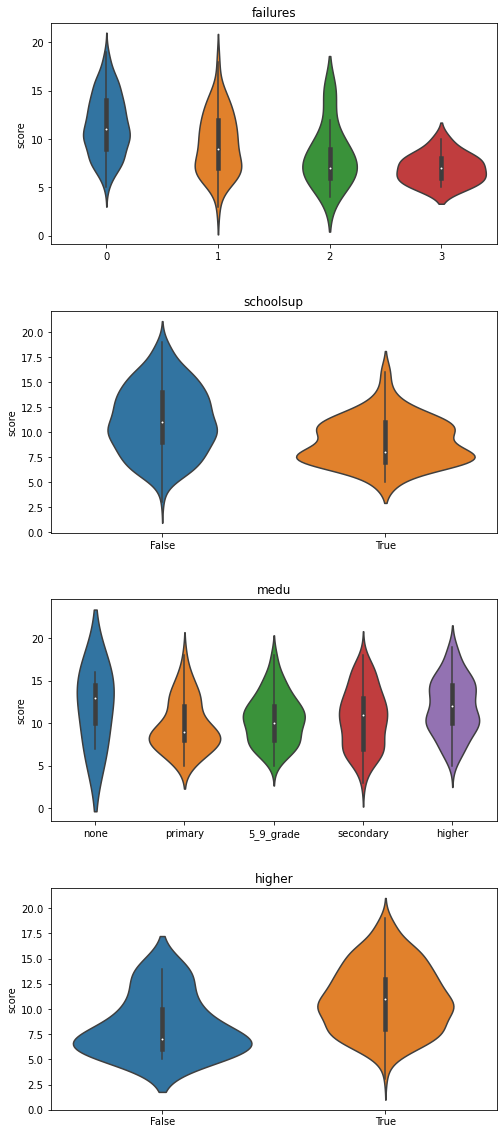

In [199]:
fig, axs = plt.subplots(nrows= 4, ncols= 1, figsize=(8, 20))
plt.subplots_adjust(hspace= 0.3)

columns= ['failures', 'schoolsup', 'medu', 'higher']

for col, ax in zip(columns, axs.ravel()):
    data= (df
        .loc[:, [col, 'score']]
    )
    sns.violinplot(
        data= data, 
        x= col, 
        y= 'score',
        ax= ax
    )
    ax.set_title(col)
    ax.set_xlabel('')
    
plt.show()